<a href="https://colab.research.google.com/github/jainkhere/neuro/blob/main/_EXPERIMENTS/11-27/flyem_experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
import skimage
import cv2

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
img = cv2.imread('/content/drive/MyDrive/CS480/test.png')

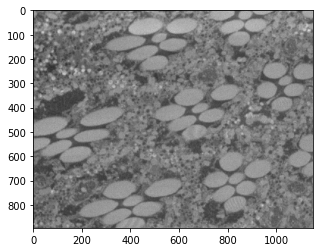

In [70]:
imshow(img)

In [92]:
downsample = 15
# first, change to 0-1
ds_array = img/255
r = skimage.measure.block_reduce(ds_array[:, :, 0],
                                 (downsample, downsample),
                                 np.mean)
g = skimage.measure.block_reduce(ds_array[:, :, 1],
                                 (downsample, downsample),
                                 np.mean)
b = skimage.measure.block_reduce(ds_array[:, :, 2],
                                 (downsample, downsample),
                                 np.mean)
ds_array = np.stack((r, g, b), axis=-1)

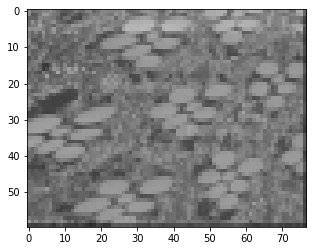

In [93]:
imshow(ds_array)

In [94]:
cv2.imwrite('/content/drive/MyDrive/CS480/ds_test.png', ds_array)

True

In [95]:
img.shape

(894, 1149, 3)

In [96]:
ds_array.shape

(60, 77, 3)

In [97]:
import scipy
from scipy import ndimage

im = cv2.imread('/content/drive/MyDrive/CS480/ds_test.png')
im = im.astype('int32')
dx = ndimage.sobel(im, 0)  # horizontal derivative
dy = ndimage.sobel(im, 1)  # vertical derivative
mag = numpy.hypot(dx, dy)  # magnitude
mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
cv2.imwrite('/content/drive/MyDrive/CS480/ds_edge.png', mag)

True

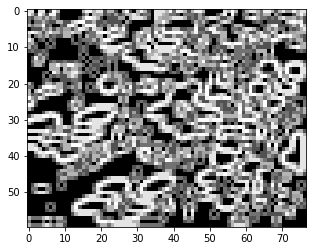

In [98]:
ds_edge_img = cv2.imread('/content/drive/MyDrive/CS480/ds_edge.png')
imshow(ds_edge_img)